In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
x = pd.read_csv('./train/x.csv')
y = pd.read_csv('./train/y.csv')

In [4]:
x = x.values
y = y.values
mn = x.mean()
sd = x.std()
x = (x - mn)/sd

In [5]:
print(x.shape)
print(y.shape)

(2250, 2)
(2250, 1)


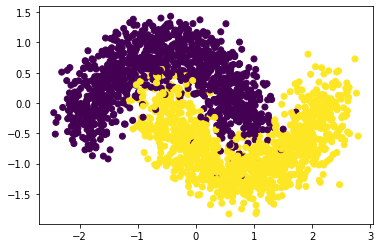

In [6]:
plt.scatter(x[:, 0], x[:, 1], c = y[:])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, shuffle = True)

In [9]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
print(x_train.shape)

(2, 1800)


In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def tanh(z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))
def cost(A, y):
    return -np.sum(np.log(A)*y + np.log(1 - A)*(1 - y))/y.shape[1]
def initialize(layer_dims):
    parameters = {}
    l = len(layer_dims)
#     print(layer_dims)
    for i in range(1, l):
        parameters['w' + str(i)] = np.random.randn(layer_dims[i], layer_dims[i - 1])
        parameters['b' + str(i)] = np.zeros((layer_dims[i], 1))
    return parameters
def forward(x, parameters):
    caches = []
    A = x
    l = len(parameters)//2
    for i in range(1, l):
        A_prev = A
        w = parameters['w' + str(i)]
        b = parameters['b' + str(i)]
        z = np.dot(w, A_prev) + b
        A = np.where(z >= 0.0, z, 0.0)
        cache = [A_prev, w, z, A]
        caches.append(cache)
    A_prev = A
    w = parameters['w' + str(l)]
    b = parameters['b' + str(l)]
    z = np.dot(w, A_prev) + b
    A = sigmoid(z)
    cache = [A_prev, w, z, A]
    caches.append(cache)
    return A, caches
def backward(Al, caches, y, parameters):
    grads = {}
    l = len(caches)
    m = Al.shape[1]
    y = y.reshape(Al.shape)
    dal = -np.divide(y, Al) + np.divide(1 - y, 1 - Al)
    A_prev, w, z, A = caches[l - 1]
    dz = dal*A*(1 - A)
    grads['dw' + str(l)] = np.dot(dz, A_prev.T)/m
    grads['db' + str(l)] = np.sum(dz, axis = 1, keepdims = True)/m
    grads['da' + str(l - 1)] = np.dot(w.T, dz)
    for i in reversed(range(l - 1)):   # l - 2 ... 0
        A_prev, w, z, A = caches[i]
        m = A_prev.shape[1]
        dz = grads['da' + str(i + 1)]*np.where(z >= 0.0, 1, 0.0)
        grads['dw' + str(i + 1)] = np.dot(dz, A_prev.T)/m
        grads['db' + str(i + 1)] = np.sum(dz, axis = 1, keepdims = True)/m
        grads['da' + str(i)] = np.dot(w.T, dz)
    return grads
def updates(parameters, grads, learning_rate):
    l = len(parameters)//2
    for i in range(l):
        parameters['w' + str(i + 1)] = parameters['w' + str(i + 1)] - learning_rate*grads['dw' + str(i + 1)]
        parameters['b' + str(i + 1)] = parameters['b' + str(i + 1)] - learning_rate*grads['db' + str(i + 1)]
    return parameters
def pred(parameters, x):
    A, cache= forward(x, parameters)
    A = np.where(A > 0.5, 1, 0)
    return A

In [38]:
def model(x_train, y_train, x_test, y_test, layer_dims, learning_rate, number_of_iterations):
    parameters = initialize(layer_dims)
    costs = []
    for i in range(number_of_iterations):
        A, cache = forward(x_train, parameters)
        grads = backward(A, cache, y_train, parameters)
        parameters = updates(parameters, grads, learning_rate)
#         print(cost(A, y_train))
        costs.append(cost(A, y_train))
    y_train_pred = pred(parameters, x_train)
    y_test_pred = pred(parameters, x_test)
    train_acc = np.count_nonzero(y_train_pred == y_train)/y_train.shape[1]
    test_acc = np.count_nonzero(y_test_pred == y_test)/y_test.shape[1]
#     plt.plot(costs[:])
    plt.scatter(x_train[0, :], x_train[1, :], c = y_train_pred)
    return parameters, train_acc, test_acc

0.9616666666666667
0.9777777777777777


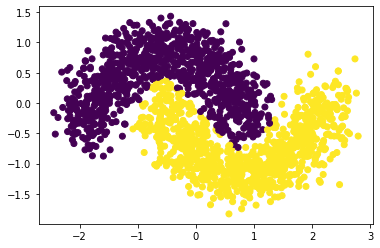

In [40]:
paramters, train_acc, test_acc = model(x_train, y_train, x_test, y_test, [x_train.shape[0], 4, 1], 0.72, 10000)
print(train_acc)
print(test_acc)

In [12]:
ip = pd.read_csv('./test/x.csv')
ip = ip.values

In [13]:
ip = (ip - mn)/sd

In [14]:
ip = ip.T

In [15]:
print(ip.shape)

(2, 750)


In [16]:
prediction =pred(paramters, ip)

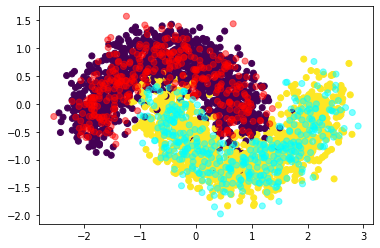

In [17]:
pred_base = pred(paramters, x.T)
pred_col = np.where(prediction > 0, 'cyan', 'red')
# print(prediction)
# print(pred_col)
plt.scatter(x[:, 0], x[:, 1], c = y[:], alpha=1)
plt.scatter(ip[0, :], ip[1, :], c = pred_col[0, :], alpha = 0.5)

In [18]:
op = pd.DataFrame({'label' : prediction[0, : ]})

In [19]:
op.head()

,label
0,0
1,0
2,1
3,0
4,1


In [20]:
op.to_csv('./test/y.csv', index= None, mode = 'w')

In [ ]:
plt.scatter?